In [4]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [2]:
image= cv2.imread('img5.jpg', 0)

array([[ 74, 107,  98, ...,  92, 113, 108],
       [ 64,  84,  98, ..., 102, 106, 113],
       [120,  93,  70, ..., 110,  96,  80],
       ...,
       [ 14,  17,   8, ...,   3,   3,   3],
       [ 12,  13,  11, ...,   3,   4,   4],
       [ 15,  14,  20, ...,   4,   5,   6]], dtype=uint8)

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # for display

(-0.5, 639.5, 967.5, -0.5)

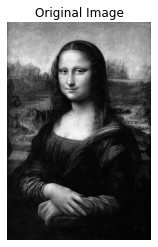

In [7]:
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

In [8]:
# Median Filter
filtered_image = cv2.medianBlur(image, 5)

Text(0.5, 1.0, 'Median Filtering')

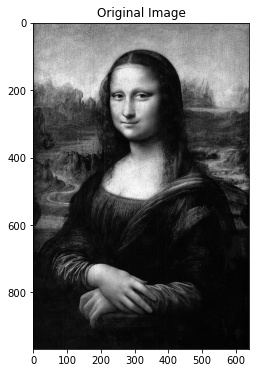

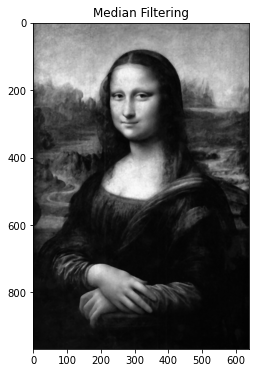

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Median Filtering')

In [10]:
# Define a kernel for max and min filtering
kernel = np.ones((5, 5), np.uint8)

In [11]:
# Perform Max filter (Dilation)
max_filtered_image = cv2.dilate(image, kernel)

In [12]:
# Perform Min filter (Erosion)
min_filtered_image = cv2.erode(image, kernel)

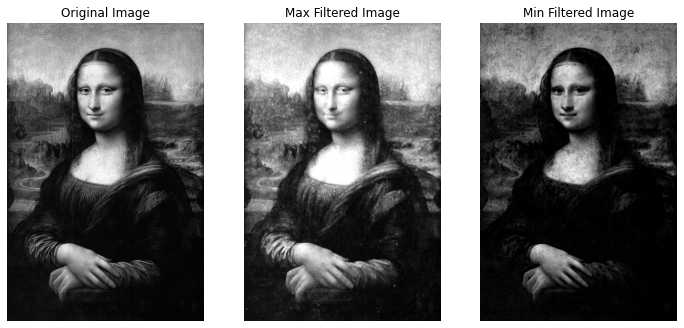

In [13]:
# Display the original, max filtered, and min filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(max_filtered_image, cmap='gray')
plt.title('Max Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

plt.show()

In [14]:
# Mid-point Filtering
# Define the kernel size for the neighborhood
kernel_size = 3
padding_size = kernel_size // 2

In [15]:
# Pad the image to handle border pixels
padded_image = cv2.copyMakeBorder(image, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_REFLECT)

In [16]:
# Create an empty output image
output_image = np.zeros_like(image)

In [17]:
# Apply midpoint filtering
for i in range(padding_size, padded_image.shape[0] - padding_size):
    for j in range(padding_size, padded_image.shape[1] - padding_size):
        neighborhood = padded_image[i-padding_size:i+padding_size+1, j-padding_size:j+padding_size+1]
        min_val = np.min(neighborhood)
        max_val = np.max(neighborhood)
        output_image[i-padding_size, j-padding_size] = (min_val + max_val) // 2

<ipython-input-17-43c5986a26a6>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  output_image[i-padding_size, j-padding_size] = (min_val + max_val) // 2


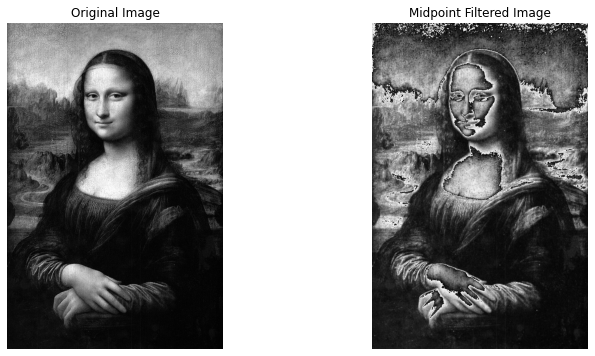

In [18]:
# Display the original and midpoint filtered images using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Midpoint Filtered Image')
plt.axis('off')

plt.show()